In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('overall.csv')

C:\Users\shrey\AppData\Local\Temp\ipykernel_39412\3710006140.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Inverse_pval_Hooks'] = 1 / filtered_df['pval-Hooks']
C:\Users\shrey\AppData\Local\Temp\ipykernel_39412\3710006140.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log_Inverse_pval_Hooks'] = np.log(filtered_df['Inverse_pval_Hooks'])


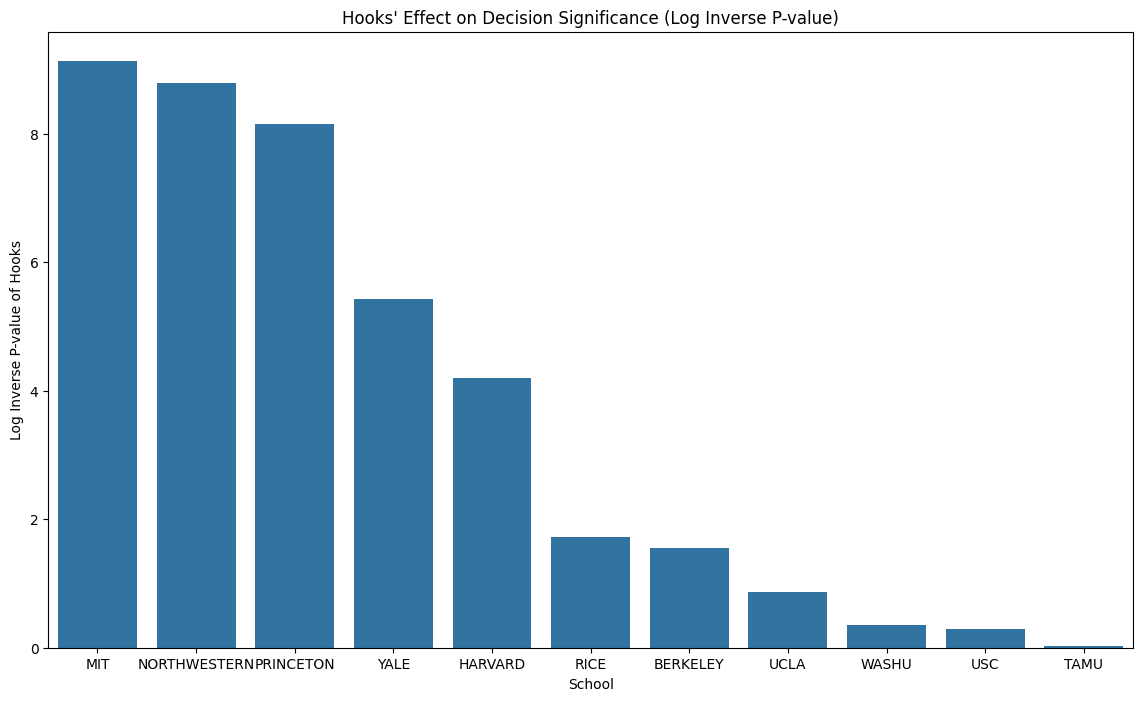

In [32]:
import numpy as np

selected_schools = ['YALE', 'HARVARD', 'MIT', 'NORTHWESTERN', 'PRINCETON', 'RICE', 
                    'BERKELEY', 'UCLA', 'WASHU', 'USC', 'TAMU']

filtered_df = df[df['School'].isin(selected_schools)]

filtered_df['Inverse_pval_Hooks'] = 1 / filtered_df['pval-Hooks']

filtered_df['Log_Inverse_pval_Hooks'] = np.log(filtered_df['Inverse_pval_Hooks'])

filtered_df = filtered_df.sort_values(by='Log_Inverse_pval_Hooks', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(y='Log_Inverse_pval_Hooks', x='School', data=filtered_df)
plt.ylabel('Log Inverse P-value of Hooks')
plt.xlabel('School')
plt.title('Hooks\' Effect on Decision Significance (Log Inverse P-value)')
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_39412\403674472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='AcceptedSATAvg', x='School', data=filtered_df, palette='viridis')


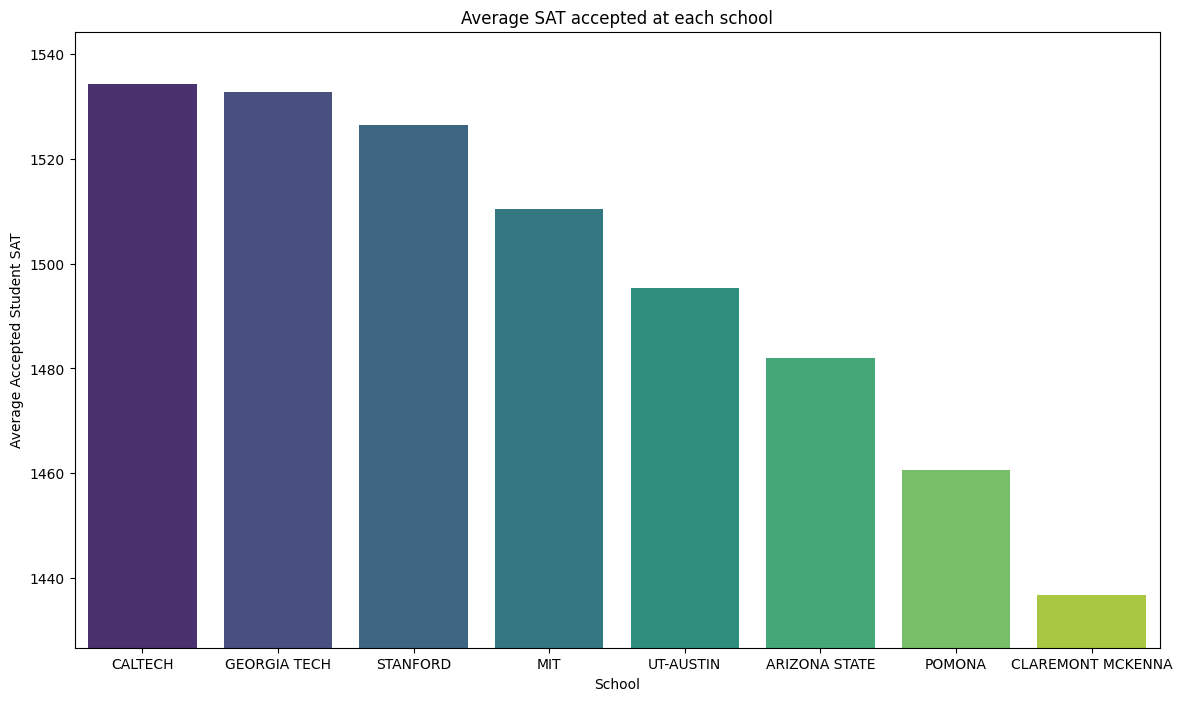

In [39]:
# average accepted SAT

selected_schools = ['CLAREMONT MCKENNA','POMONA','ARIZONA STATE','UT-AUSTIN', 'MIT' ,'STANFORD', 'GEORGIA TECH', 'CALTECH']

filtered_df = df[df['School'].isin(selected_schools)]
filtered_df = filtered_df.sort_values(by='AcceptedSATAvg', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(y='AcceptedSATAvg', x='School', data=filtered_df, palette='viridis')
plt.ylabel('Average Accepted Student SAT')
plt.xlabel('School')
plt.title('Average SAT accepted at each school')
plt.ylim(filtered_df['AcceptedSATAvg'].min() - 10, filtered_df['AcceptedSATAvg'].max() + 10 )
plt.show()

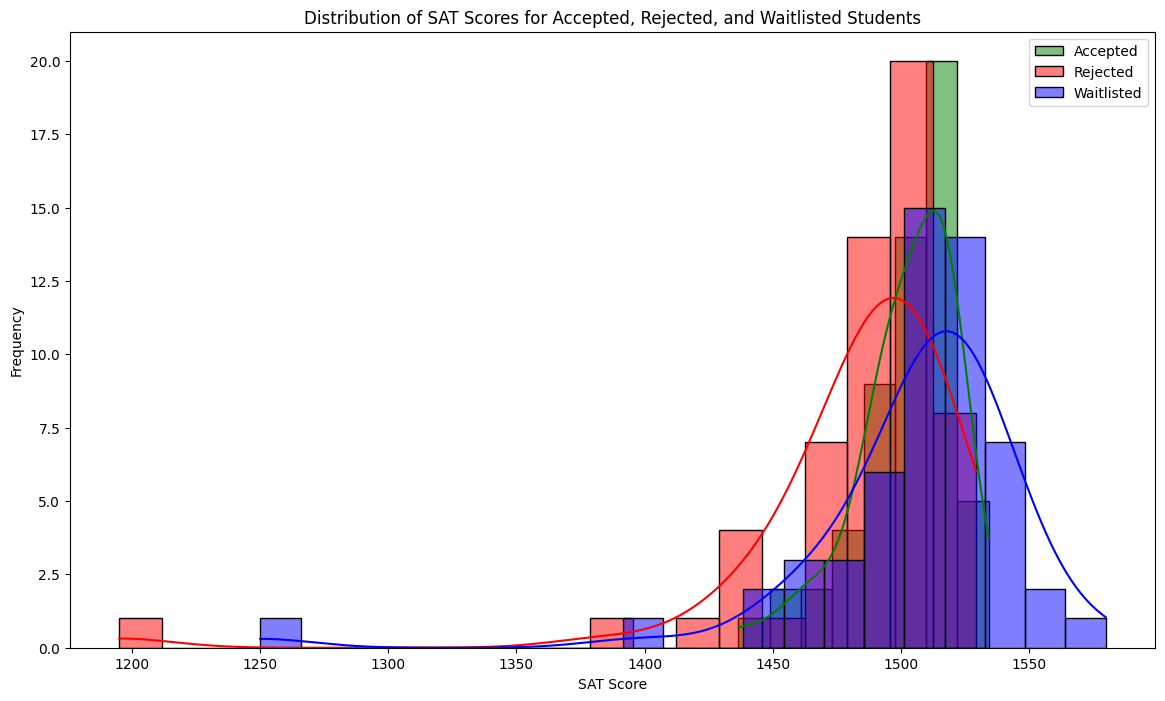

In [14]:
plt.figure(figsize=(14, 8))
sns.histplot(df['AcceptedSATAvg'], color='green', label='Accepted', kde=True)
sns.histplot(df['RejectedSATAvg'], color='red', label='Rejected', kde=True)
sns.histplot(df['WaitlistedSATAvg'], color='blue', label='Waitlisted', kde=True)
plt.xlabel('SAT Score')
plt.ylabel('Frequency')
plt.title('Distribution of SAT Scores for Accepted, Rejected, and Waitlisted Students')
plt.legend()
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_39412\1558920151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COR-SAT-Decision', y='School', data=school_sat_correlation, palette='viridis')


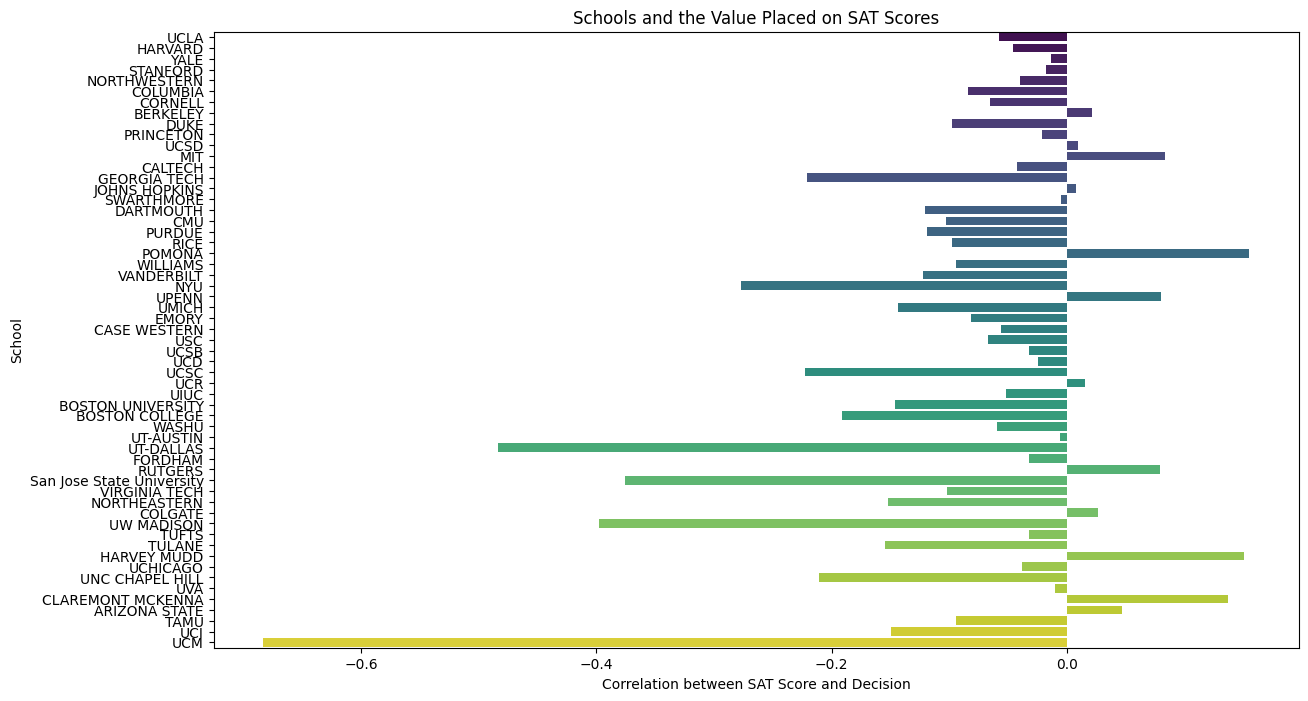

In [15]:
# Extract columns related to school and SAT correlation
school_sat_correlation = df[['School', 'COR-SAT-Decision']]

# Plot the correlation
plt.figure(figsize=(14, 8))
sns.barplot(x='COR-SAT-Decision', y='School', data=school_sat_correlation, palette='viridis')
plt.xlabel('Correlation between SAT Score and Decision')
plt.ylabel('School')
plt.title('Schools and the Value Placed on SAT Scores')
plt.show()


<Figure size 1400x800 with 0 Axes>

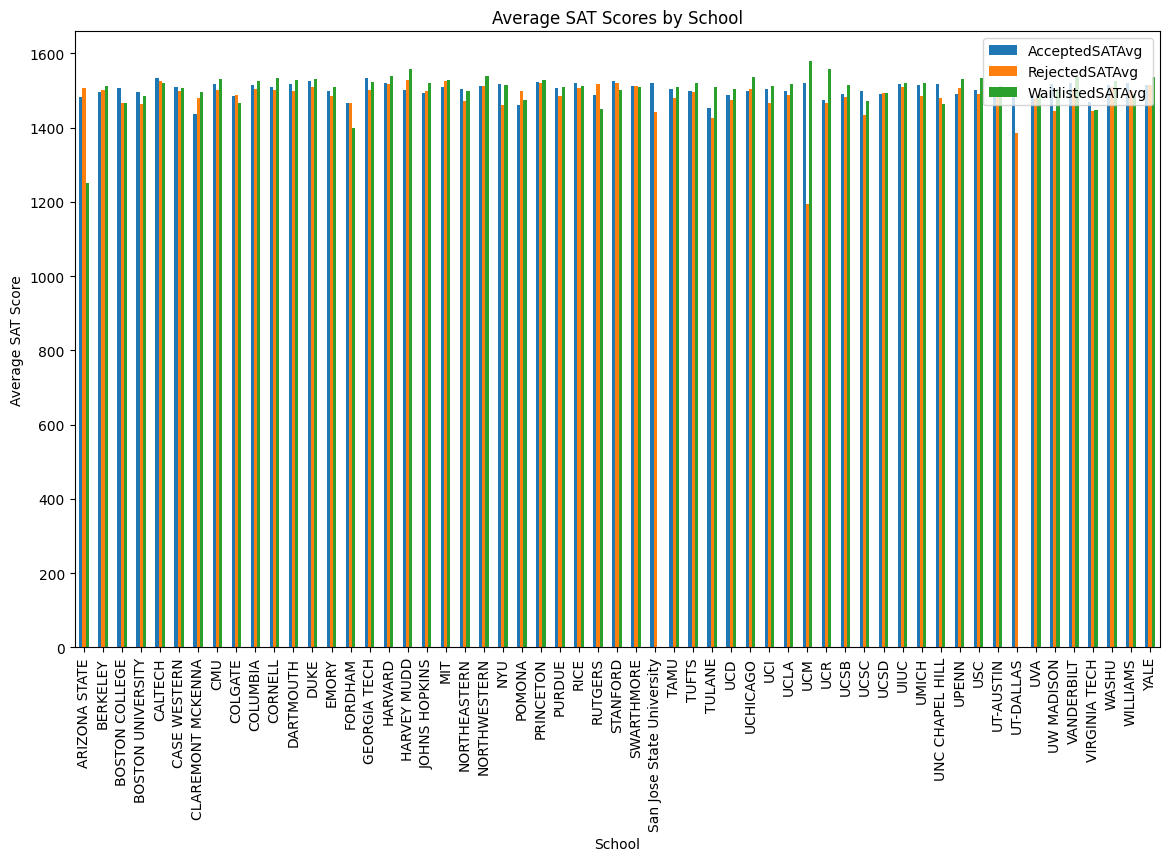

In [16]:
avg_sat_scores_by_school = df.groupby('School')[['AcceptedSATAvg', 'RejectedSATAvg', 'WaitlistedSATAvg']].mean().reset_index()

plt.figure(figsize=(14, 8))
avg_sat_scores_by_school.set_index('School').plot(kind='bar', figsize=(14, 8))
plt.xlabel('School')
plt.ylabel('Average SAT Score')
plt.title('Average SAT Scores by School')
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_39412\3438404222.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMP-SAT', y='School', data=importance_by_school, palette='plasma')


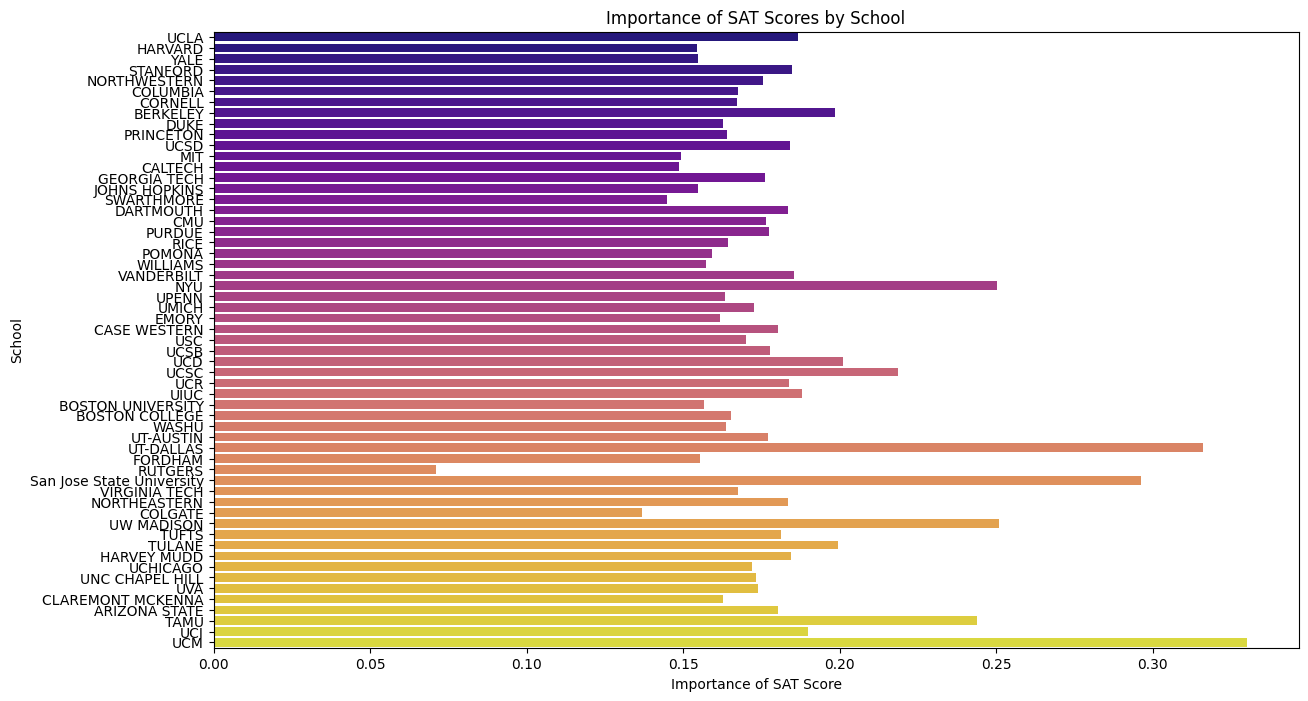

In [17]:
importance_by_school = df[['School', 'IMP-SAT']]

plt.figure(figsize=(14, 8))
sns.barplot(x='IMP-SAT', y='School', data=importance_by_school, palette='plasma')
plt.xlabel('Importance of SAT Score')
plt.ylabel('School')
plt.title('Importance of SAT Scores by School')
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_39412\3411008341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COR-EC-Decision', y='School', data=df, palette='coolwarm')


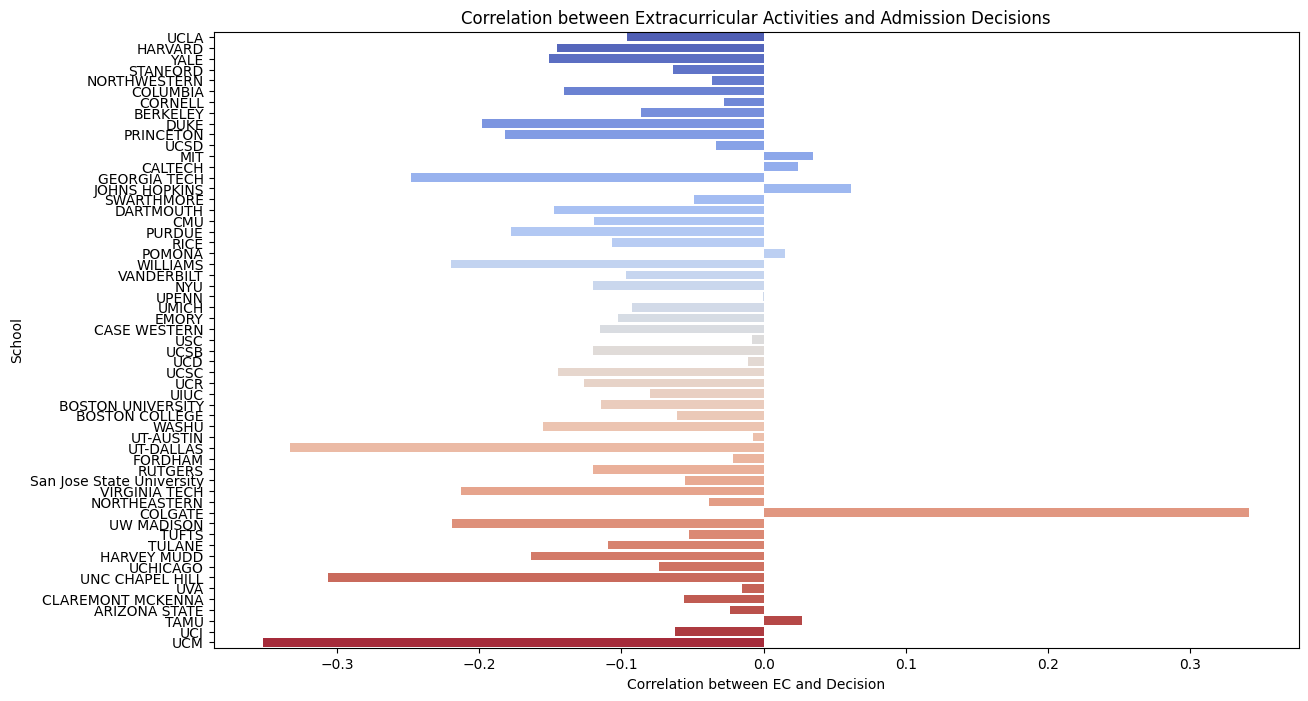

In [18]:
plt.figure(figsize=(14, 8))
sns.barplot(x='COR-EC-Decision', y='School', data=df, palette='coolwarm')
plt.xlabel('Correlation between EC and Decision')
plt.ylabel('School')
plt.title('Correlation between Extracurricular Activities and Admission Decisions')
plt.show()


<Figure size 1400x800 with 0 Axes>

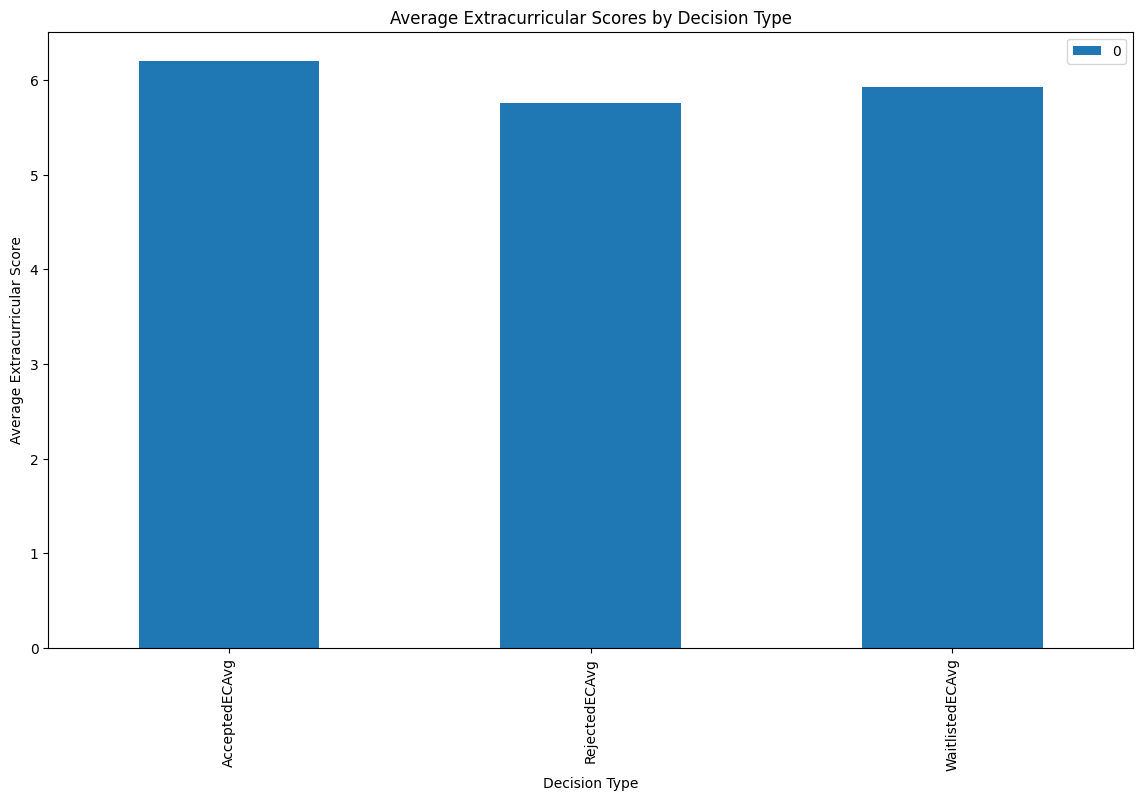

In [19]:
avg_ec_by_decision = df[['AcceptedECAvg', 'RejectedECAvg', 'WaitlistedECAvg']].mean().reset_index()

plt.figure(figsize=(14, 8))
avg_ec_by_decision.set_index('index').plot(kind='bar', figsize=(14, 8))
plt.xlabel('Decision Type')
plt.ylabel('Average Extracurricular Score')
plt.title('Average Extracurricular Scores by Decision Type')
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_39412\2811801940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMP-ESSAY-LOR-INTERVIEW', y='School', data=importance_essays_by_school, palette='magma')


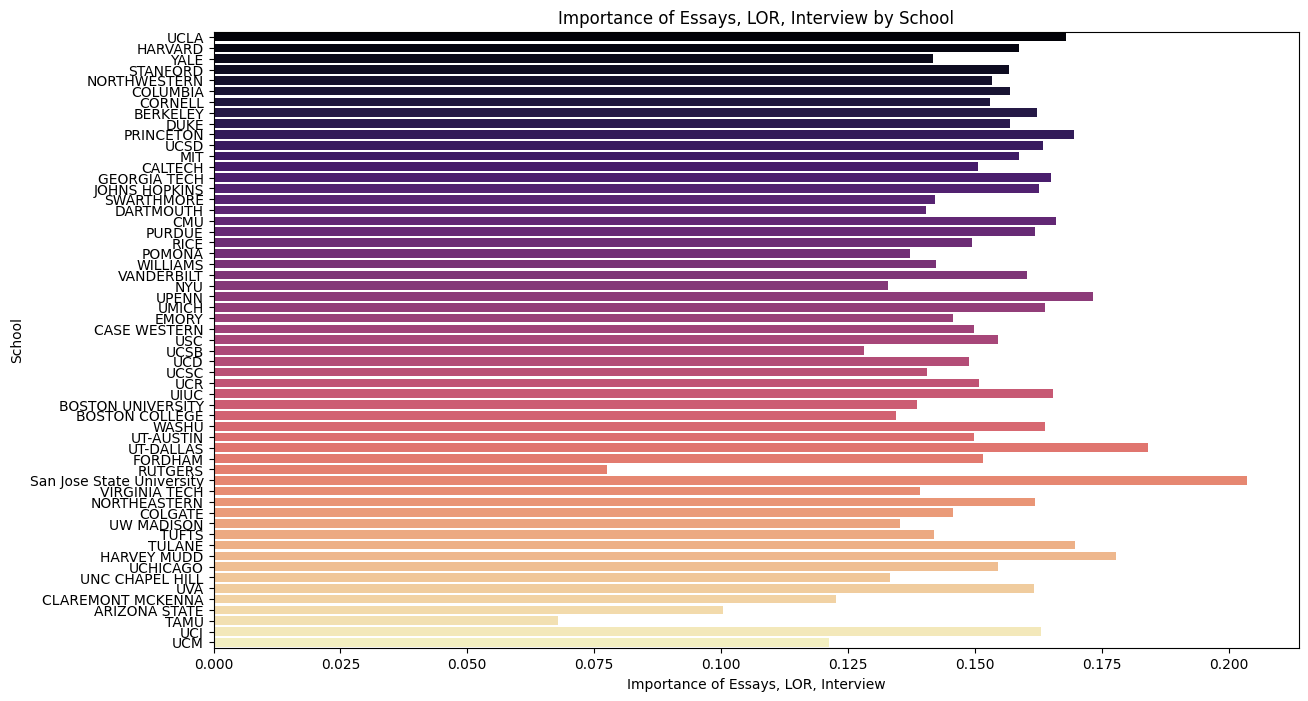

In [20]:
importance_essays_by_school = df[['School', 'IMP-ESSAY-LOR-INTERVIEW']]

plt.figure(figsize=(14, 8))
sns.barplot(x='IMP-ESSAY-LOR-INTERVIEW', y='School', data=importance_essays_by_school, palette='magma')
plt.xlabel('Importance of Essays, LOR, Interview')
plt.ylabel('School')
plt.title('Importance of Essays, LOR, Interview by School')
plt.show()


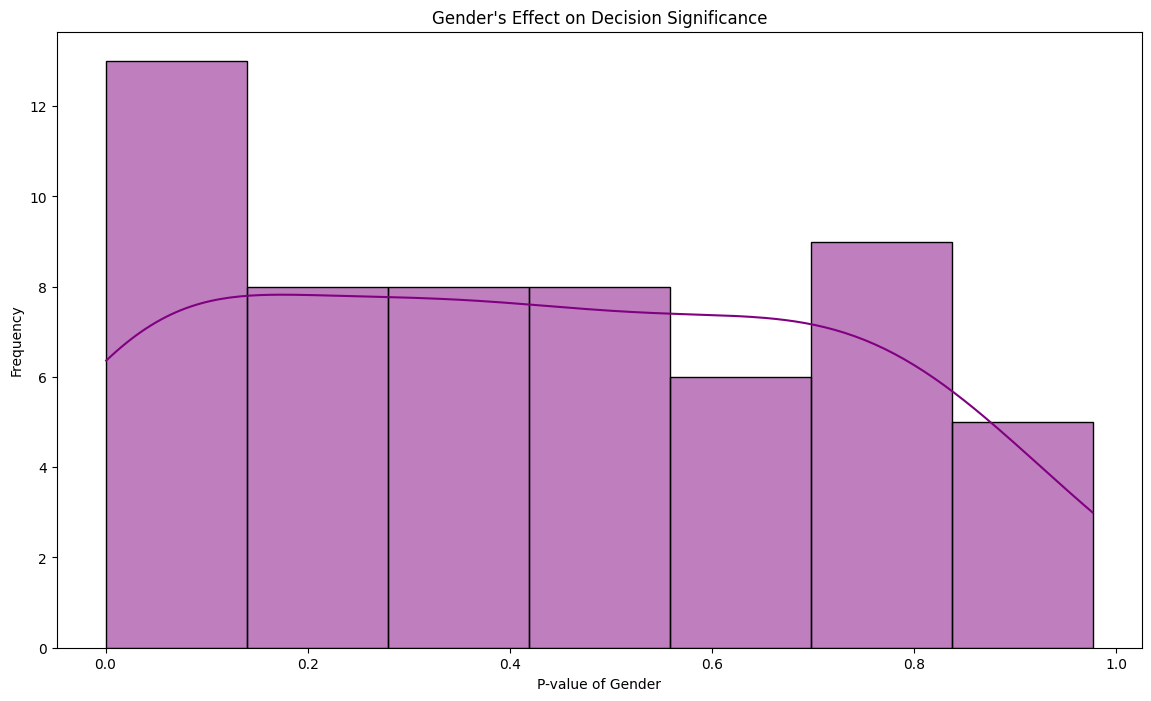

In [21]:
plt.figure(figsize=(14, 8))
sns.histplot(df['pval-Gender'], kde=True, color='purple')
plt.xlabel('P-value of Gender')
plt.ylabel('Frequency')
plt.title('Gender\'s Effect on Decision Significance')
plt.show()


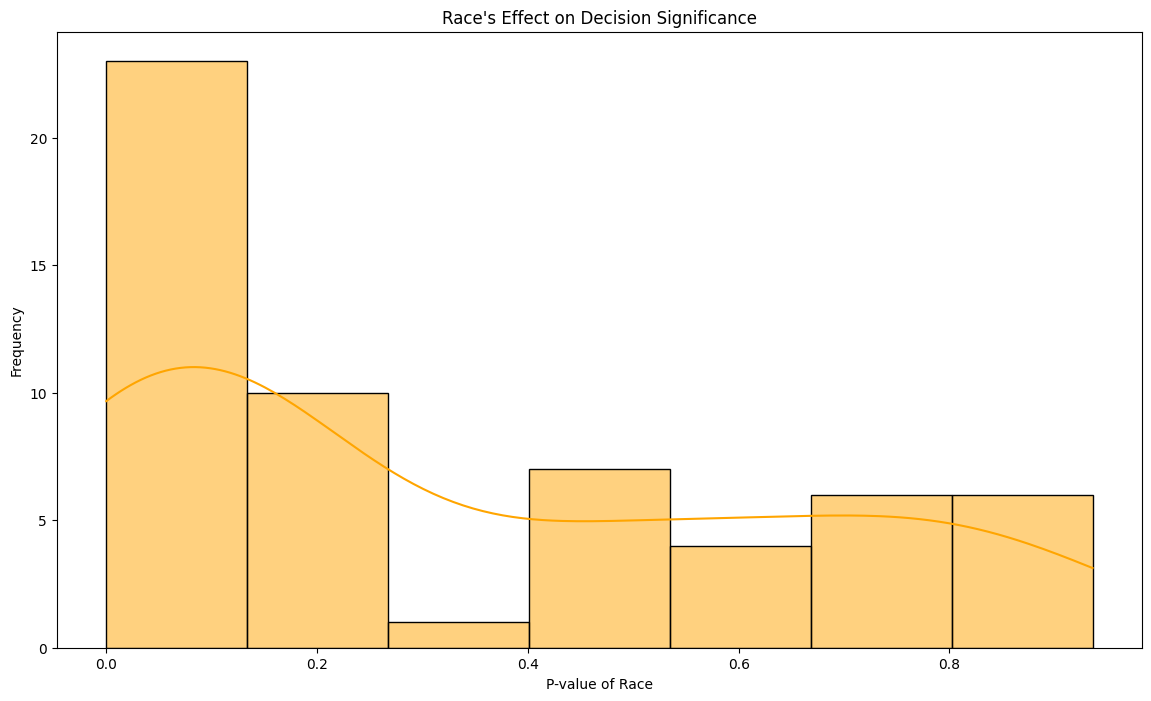

In [22]:
plt.figure(figsize=(14, 8))
sns.histplot(df['pval-Race'], kde=True, color='orange')
plt.xlabel('P-value of Race')
plt.ylabel('Frequency')
plt.title('Race\'s Effect on Decision Significance')
plt.show()


<Figure size 1400x800 with 0 Axes>

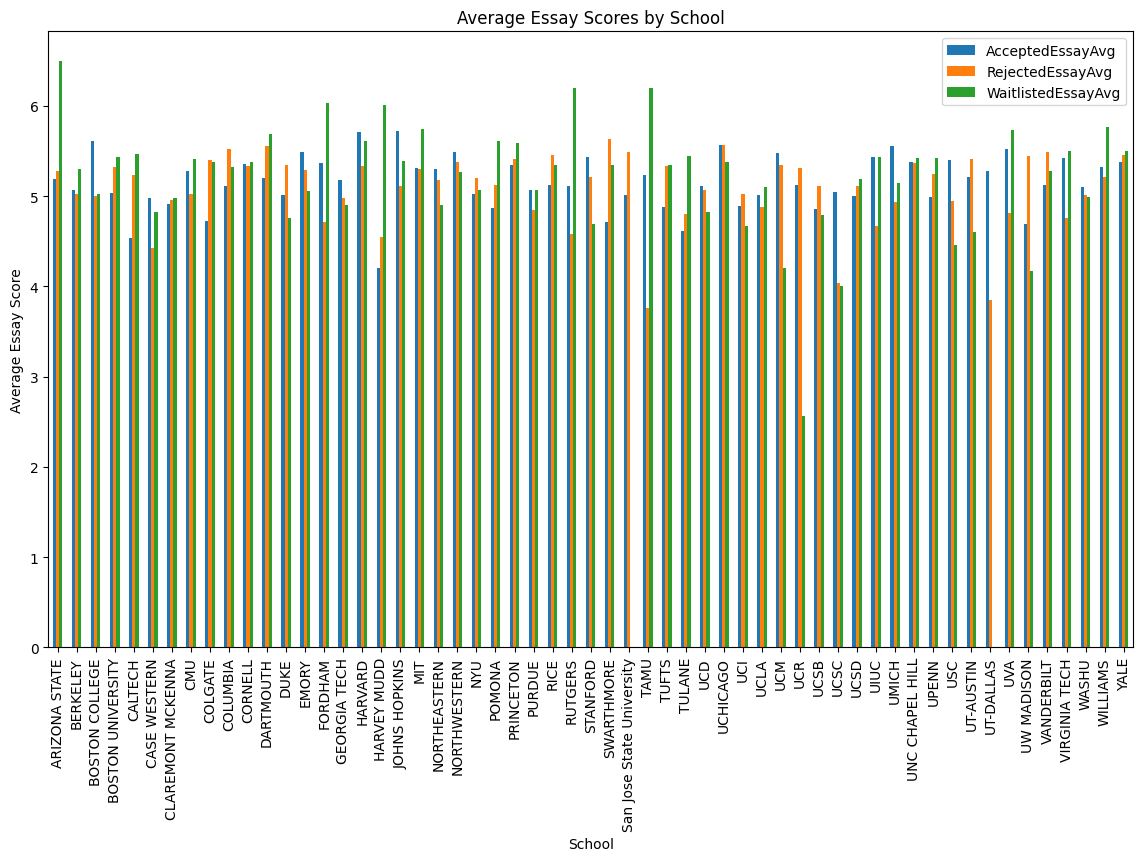

In [23]:
avg_essay_scores_by_school = df.groupby('School')[['AcceptedEssayAvg', 'RejectedEssayAvg', 'WaitlistedEssayAvg']].mean().reset_index()

plt.figure(figsize=(14, 8))
avg_essay_scores_by_school.set_index('School').plot(kind='bar', figsize=(14, 8))
plt.xlabel('School')
plt.ylabel('Average Essay Score')
plt.title('Average Essay Scores by School')
plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_39412\2968500246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMP-Income', y='School', data=importance_income_by_school, palette='inferno')


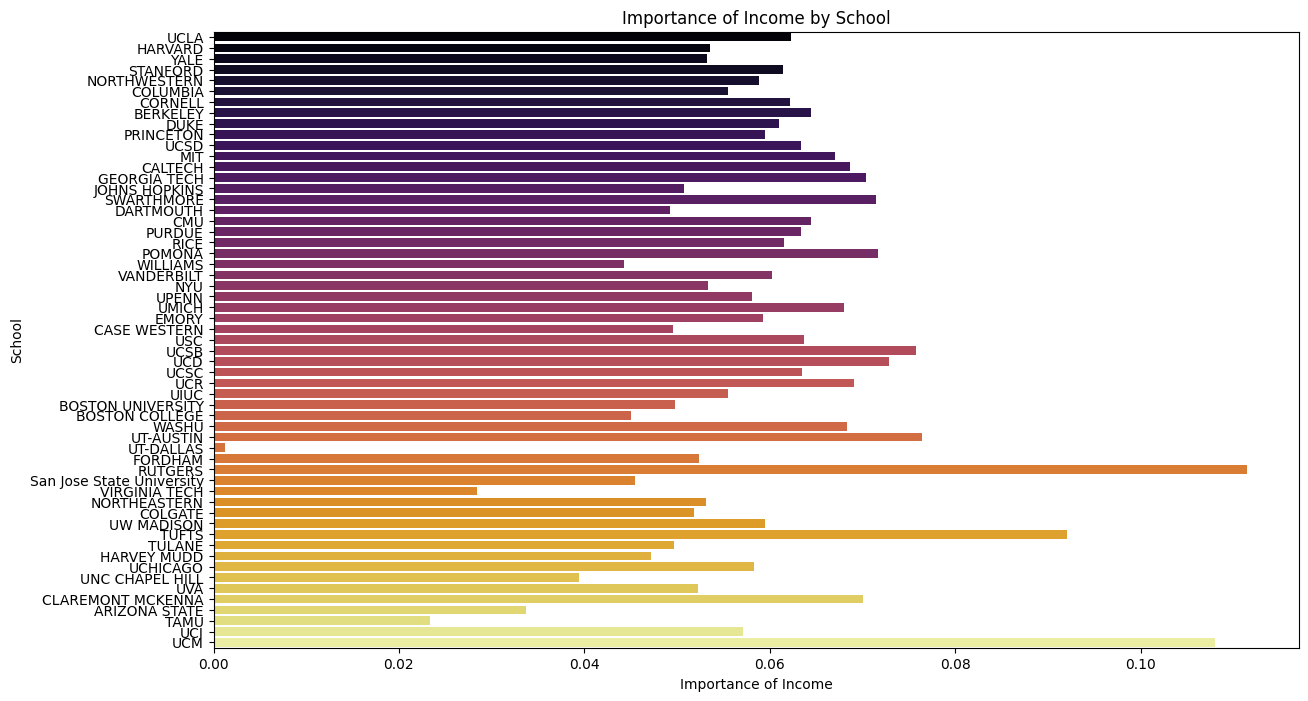

In [24]:
importance_income_by_school = df[['School', 'IMP-Income']]

plt.figure(figsize=(14, 8))
sns.barplot(x='IMP-Income', y='School', data=importance_income_by_school, palette='inferno')
plt.xlabel('Importance of Income')
plt.ylabel('School')
plt.title('Importance of Income by School')
plt.show()
